In [310]:
# Import av dependencies
%matplotlib inline

# Python imports
import math, time, random, datetime

# Data manipulation
import numpy as np
import pandas as pd

# Visualisering
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

# Ignorera varningar (för nu)
import warnings
warnings.filterwarnings('ignore')

# Import av träningsdata
train = pd.read_csv('data/weatherAUS.csv')

# Överblick av träningsdatan
train.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


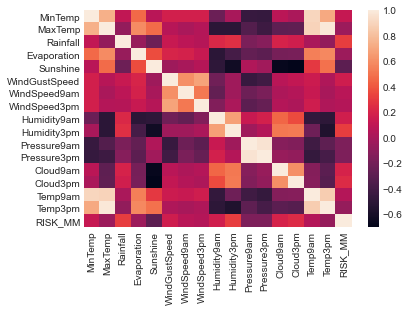

In [313]:
df_graphics = pd.DataFrame()
df_graphics = train
# for i in df_graphics.columns:
#   plt.hist(df_graphics[i])
#   plt.title(i)
#    plt.show()
sns.heatmap(df_graphics.corr())

In [ ]:
# Metadata över NUMERISK data weatherAUS.csv
train.describe()

In [ ]:
# Metadata över KATEGORISK data weatherAUS.csv
train.describe(include=['object'])

In [ ]:
# Ta fram saknade värden i datan
missingno.matrix(train)

In [ ]:
# Ta fram saknade värden i datan, alt 2
train.isnull().sum()

In [ ]:
# numerical = pd.DataFrame() # för numeriska variabler(Temperatur, Vindhastighet osv)
# categorical = pd.DataFrame() # för kategoriska variabler(Ja/Nej, Väderstreck osv)


df_bin = pd.DataFrame() # för discretised continous variables
df_con = pd.DataFrame() # för continous variables

In [ ]:
# Går igenom kolumnerna och tar fram alla numeriska variabler och lägger i en list
# numerical = [var for var in train.columns if train[var].dtype!='O']
# print('There are {} numerical variables\n'.format(len(numerical)))
# print('The numerical variables are :', numerical)

In [ ]:
# Går igenom kolumnerna och tar fram alla kategoriska variabler och lägger i en list
# categorical = [var for var in train.columns if train[var].dtype=='O']
# print('There are {} categorical variables\n'.format(len(categorical)))
# print('The numerical variables are :', categorical)

In [ ]:
# Ta fram de olika datatyperna
train.dtypes

In [ ]:
fig = plt.figure(figsize=(20,1))
sns.countplot(y='RainTomorrow', data=train);
print(train.RainTomorrow.value_counts())

In [ ]:
# Lägger till i subset dataframes
df_bin['RainTomorrow'] = train['RainTomorrow']
df_con['RainTomorrow'] = train['RainTomorrow']

In [ ]:
df_bin.head()

In [ ]:
df_con.head()

In [ ]:
train.Date.isnull().sum()

In [ ]:
df_bin['Date'] = train['Date']
df_con['Date'] = train['Date']

In [ ]:
train.Location.value_counts()

In [ ]:
train.Location.isnull().sum()

In [ ]:
df_bin['Location'] = train['Location']
df_con['Location'] = train['Location']

In [ ]:
train.MinTemp.isnull().sum()

In [ ]:
train.MinTemp = train['MinTemp'].interpolate(method='linear')

In [ ]:
train.MinTemp.isnull().sum()

In [ ]:
df_bin['MinTemp'] = train['MinTemp']
df_con['MinTemp'] = train['MinTemp']

In [ ]:
df_bin.head()

In [ ]:
df_bin['MaxTemp'] = train['MaxTemp']
df_con['MaxTemp'] = train['MaxTemp']

In [ ]:
train.Rainfall.isnull().sum()

In [ ]:
train.Rainfall = train['Rainfall'].interpolate(method='linear')
train.Rainfall.isnull().sum()

In [ ]:
df_bin['Rainfall'] = train['Rainfall']
df_con['Rainfall'] = train['Rainfall']
df_bin.head()

In [ ]:
train.Evaporation.isnull().sum()

In [ ]:
train.Evaporation = train['Evaporation'].interpolate(method='linear')
train.Evaporation.isnull().sum()

In [ ]:
df_bin['Evaporation'] = train['Evaporation']
df_con['Evaporation'] = train['Evaporation']
df_bin.head()

In [ ]:
train.Evaporation.plot.hist()

In [ ]:
df_bin.Evaporation.isnull().sum()

In [ ]:
# Ta bort NA värden från Evaporation
print(len(df_bin.Evaporation))
df_bin = df_bin.dropna(subset=['Evaporation'])
df_con = df_con.dropna(subset=['Evaporation'])
print(len(df_bin.Evaporation))

In [ ]:
df_bin.head()

In [ ]:
train.Sunshine.isnull().sum()

In [ ]:
train.Sunshine = train['Sunshine'].interpolate(method='linear')
train.Sunshine.isnull().sum()

In [ ]:
df_bin['Sunshine'] = train['Sunshine']
df_con['Sunshine'] = train['Sunshine']
df_bin.head()

In [ ]:
# Ta bort NA värden från Sunshine
print(len(df_bin.Sunshine))
df_bin = df_bin.dropna(subset=['Sunshine'])
df_con = df_con.dropna(subset=['Sunshine'])
print(len(df_bin.Sunshine))

In [ ]:
df_bin.Sunshine.isnull().sum()

In [ ]:
train.WindGustDir.isnull().sum()

In [ ]:
print(train.WindGustDir)

In [ ]:
train.WindGustDir.values

In [ ]:
# Lägger till WindGustDir till dataframe
df_bin['WindGustDir'] = train['WindGustDir']
# Droppar alla NaN-värden för att kunna koda om väderstreck(str) till int
df_bin = df_bin.dropna(subset=['WindGustDir'])
# Använder labelencoder för att transformera str -> int
lb_make = LabelEncoder()
df_bin['WindGustDirNum'] = lb_make.fit_transform(df_bin['WindGustDir'])
# Tar bort WindGustDir då den ej behövs mer
df_bin = df_bin.drop(['WindGustDir'], axis=1)
df_bin.head()

# =============================================================================
## OBS TANKE TILL FÖRBÄTTRING -> Ändra NaN till en sträng, sedan omvandla och antingen låt vara eller försök manipulera
# =============================================================================

In [ ]:
train.WindGustSpeed.isnull().sum()

In [ ]:
train.WindGustSpeed = train['WindGustSpeed'].interpolate(method='linear')
train.WindGustSpeed.isnull().sum()

In [ ]:
df_bin['WindGustSpeed'] = train['WindGustSpeed']
df_con['WindGustSpeed'] = train['WindGustSpeed']
df_bin.head()

In [ ]:
# Lägger till WindGustDir9am till dataframe
df_bin['WindDir9am'] = train['WindDir9am']
# Droppar alla NaN-värden för att kunna koda om väderstreck(str) till int
df_bin = df_bin.dropna(subset=['WindDir9am'])
# Använder labelencoder för att transformera str -> int
lb_make = LabelEncoder()
df_bin['WindDir9amNum'] = lb_make.fit_transform(df_bin['WindDir9am'])
# Tar bort WindGustDir9am då den ej behövs mer
df_bin = df_bin.drop(['WindDir9am'], axis=1)
df_bin.head()

In [ ]:
# Lägger till WindDir3pm till dataframe
df_bin['WindDir3pm'] = train['WindDir3pm']
# Droppar alla NaN-värden för att kunna koda om väderstreck(str) till int
df_bin = df_bin.dropna(subset=['WindDir3pm'])
# Använder labelencoder för att transformera str -> int
lb_make = LabelEncoder()
df_bin['WindDir3pmNum'] = lb_make.fit_transform(df_bin['WindDir3pm'])
# Tar bort WindDir3pm då den ej behövs mer
df_bin = df_bin.drop(['WindDir3pm'], axis=1)
df_bin.head()

In [ ]:
train.WindSpeed9am.isnull().sum()

In [ ]:
train.WindSpeed9am = train['WindSpeed9am'].interpolate(method='linear')
train.WindSpeed9am.isnull().sum()

In [ ]:
df_bin['WindSpeed9am'] = train['WindSpeed9am']
df_con['WindSpeed9am'] = train['WindSpeed9am']
df_bin.head()

In [ ]:
train.WindSpeed3pm.isnull().sum()

In [ ]:
train.WindSpeed3pm = train['WindSpeed3pm'].interpolate(method='linear')
train.WindSpeed3pm.isnull().sum()

In [ ]:
df_bin['WindSpeed3pm'] = train['WindSpeed3pm']
df_con['WindSpeed3pm'] = train['WindSpeed3pm']
df_bin.head()